In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin, lfilter
from scipy.ndimage import uniform_filter1d

# Загрузка сигнала из файла
x = np.loadtxt(r'C:\Users\areak\Desktop\sth\emg_raw.txt')

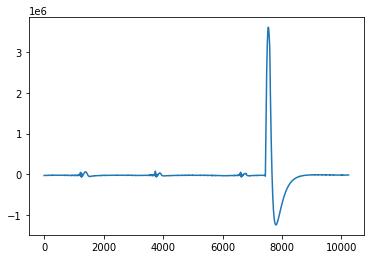

In [3]:
# Необработанный сигнал
plt.plot(x)
plt.show()

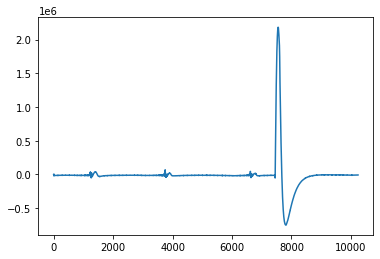

In [4]:
# КИХ-фильт и его применение к сигналу 
def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
  nyq = 0.5 * fs
  taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                window=window, scale=False)
  return taps

lowcut = 20
highcut = 450
ntaps = 20
fs = 1000
taps_hamming = bandpass_firwin(ntaps, lowcut, highcut, fs=fs)
firwin_x = lfilter(taps_hamming, 1.0, x)
plt.plot(firwin_x)
plt.show()

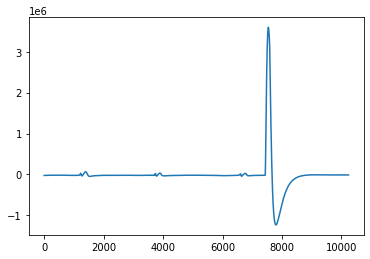

In [5]:
# Moving average (MA) filter
filtered_x = uniform_filter1d(x, size=20,mode='nearest')
plt.plot(filtered_x)
plt.show()

In [14]:
CUT_SIZE = 2000
THRESHOLD = 15000
THRESHOLD_MAX = 10**5
cut_signals = np.empty(shape=(1,CUT_SIZE))
cut_signals

array([[1.44417111e-311, 1.44417038e-311, 9.99395988e-320, ...,
        8.63457759e+217, 1.93932427e+247, 1.16832135e+219]])

In [16]:
mean_signal_value = filtered_x.mean()
threshold_value = mean_signal_value + THRESHOLD
for i in range(filtered_x.shape[0] - CUT_SIZE):
    max_slider_value = filtered_x[i:i+CUT_SIZE].max()
    if max_slider_value < THRESHOLD_MAX:
        id_max_slider_value = filtered_x[i:i+CUT_SIZE].argmax()
        if max_slider_value > threshold_value and id_max_slider_value == np.rint(CUT_SIZE/2):
            cut_signal = filtered_x[i:i+CUT_SIZE].reshape((1,CUT_SIZE))
            cut_signals = np.append(cut_signals, cut_signal, axis=0)
cut_signals = np.delete(cut_signals, 0, axis=0)

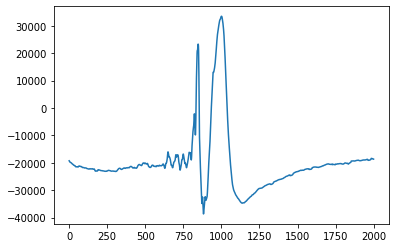

In [21]:
plt.plot(cut_signals[1])
plt.show()